# شجرة القرار كخوارزمية تصنيف

## تحديد نوع السيارة

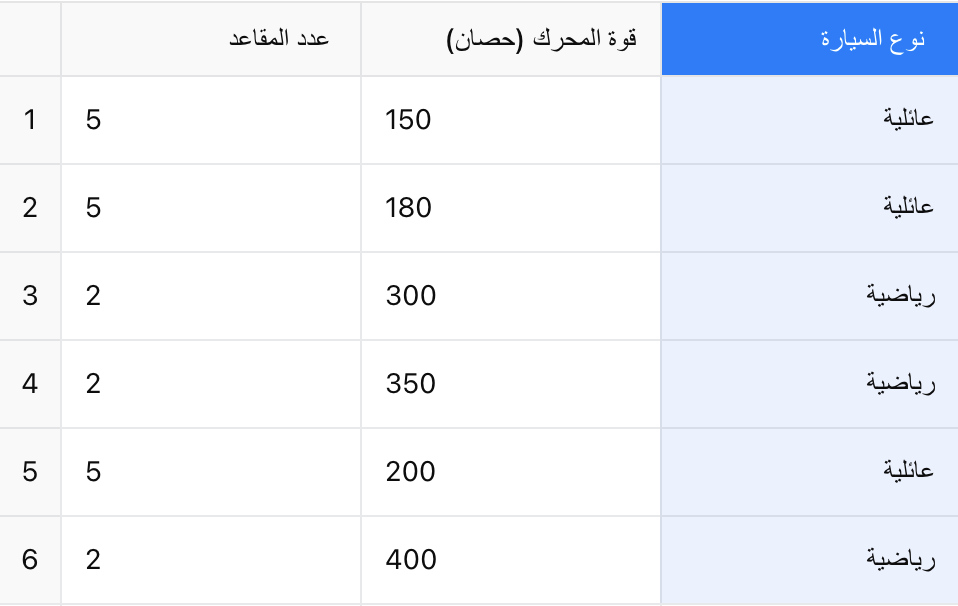

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# بيانات التدريب: [عدد المقاعد, قوة المحرك (حصان)]
X = [
    [5, 150],  # سيارة عائلية
    [5, 180],  # سيارة عائلية
    [2, 300],  # سيارة رياضية
    [2, 350],  # سيارة رياضية
    [5, 200],  # سيارة عائلية
    [2, 400]   # سيارة رياضية
]

# التصنيفات: 1 = رياضية، 0 = عائلية
y = [0, 0, 1, 1, 0, 1]

# إنشاء نموذج شجرة القرار
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X, y)

# اختبار النموذج
new_car = [[2, 320]]  # سيارة بمقعدين ومحرك 320 حصان
prediction = model.predict(new_car)

print("🚗 نوع السيارة:", "رياضية" if prediction[0] == 1 else "عائلية")


🚗 نوع السيارة: رياضية


In [ ]:
!pip install arabic-reshaper
!pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 6.4 MB/s eta 0:00:00


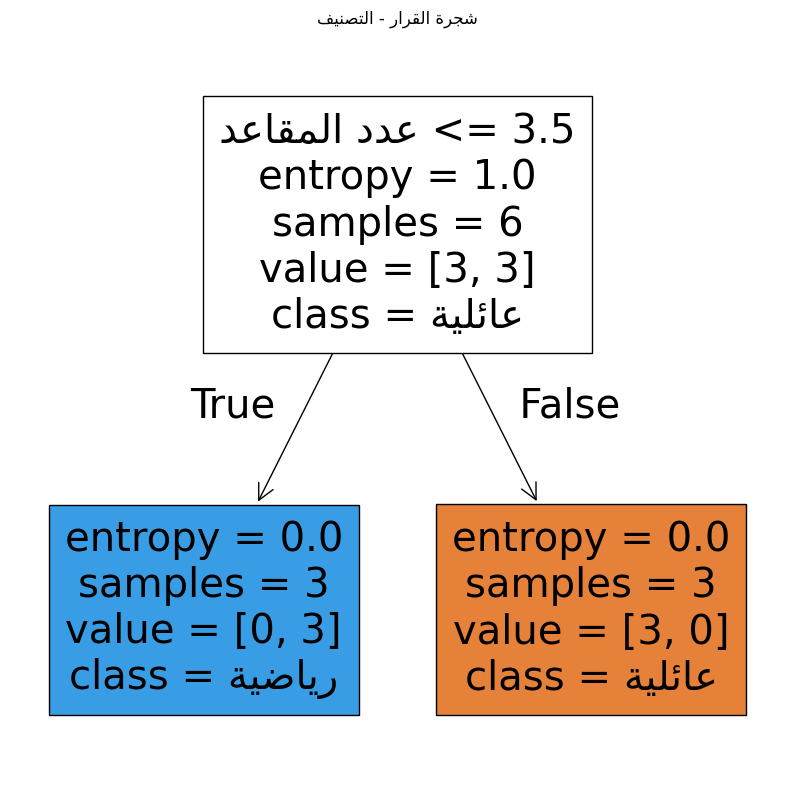

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import arabic_reshaper
from bidi.algorithm import get_display

feature_names = ["عدد المقاعد", "قوة المحرك"]
class_names = ["عائلية", "رياضية"]

# إعادة تشكيل النصوص العربية
reshaped_features = [get_display(arabic_reshaper.reshape(f)) for f in feature_names]
reshaped_classes = [get_display(arabic_reshaper.reshape(c)) for c in class_names]
title = get_display(arabic_reshaper.reshape("شجرة القرار - التصنيف"))

# رسم شجرة القرار للتصنيف
plt.figure(figsize=(10, 10))
plot_tree(model, feature_names=reshaped_features, class_names=reshaped_classes, filled=True)
plt.title(title)
plt.show()

In [ ]:
print("Feature used in Root Node:", model.tree_.feature[0])
print("Threshold used in Root Node:", model.tree_.threshold[0])

Feature used in Root Node: 0
Threshold used in Root Node: 3.5


In [ ]:
print("Feature importances:", model.feature_importances_)

Feature importances: [1. 0.]


# شجرة القرار كخوارزمية انحدار

## توقع سعر السيارة

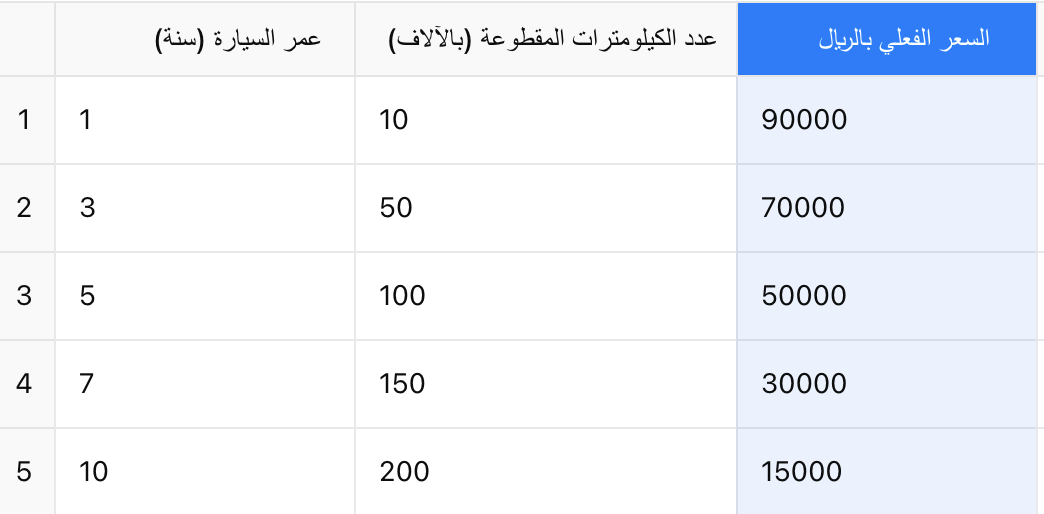

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# بيانات التدريب: [عمر السيارة (سنة), عدد الكيلومترات المقطوعة (بالآلاف)]
X = [
    [1, 10],
    [3, 50],
    [5, 100],
    [7, 150],
    [10, 200]
]

# الأسعار الفعلية بالريال (هدف التنبؤ)
y = [90000, 70000, 50000, 30000, 15000]

# إنشاء نموذج شجرة القرار للانحدار
model_rg = DecisionTreeRegressor(criterion="squared_error", random_state=42)
model_rg.fit(X, y)

# اختبار النموذج
new_car = [[2, 80]]  # سيارة عمرها 4 سنوات وقطعت 80 ألف كيلومتر
predicted_price = model_rg.predict(new_car)

print("💰 السعر المتوقع للسيارة:", int(predicted_price[0]), "ريال")

💰 السعر المتوقع للسيارة: 70000 ريال


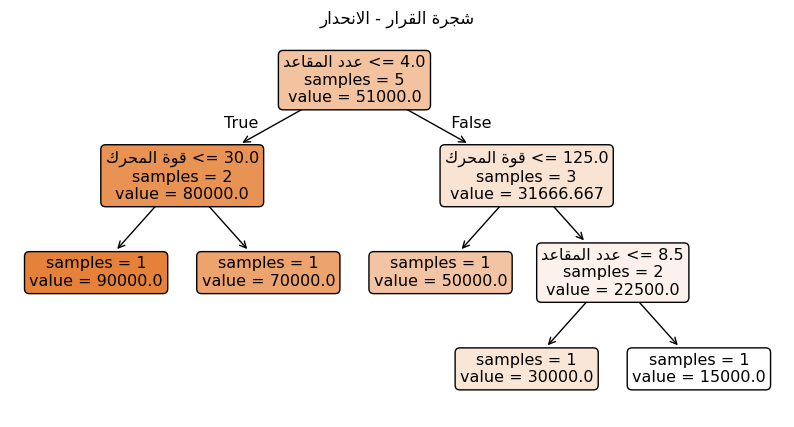

In [ ]:
# إعادة تشكيل النصوص العربية
feature_names = ["عدد المقاعد" , "قوة المحرك"]
reshaped_features = [get_display(arabic_reshaper.reshape(f)) for f in feature_names]
title = get_display(arabic_reshaper.reshape("شجرة القرار - الانحدار"))

# رسم شجرة القرار للانحدار
plt.figure(figsize=(10, 5))
plot_tree(model_rg, feature_names=reshaped_features, filled=True, rounded=True, impurity=False)
plt.title(title)
plt.show()